In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.read_csv('cleaned_data.csv')

# Separate data into two dataframes based on 'Has_Diabetes'
df_true = df[df['Has_Diabetes'] == True]
df_false = df[df['Has_Diabetes'] == False]

# Get the minimum number of rows between True and False dataframes
min_rows = min(len(df_true), len(df_false))

# Sample equal number of rows from both True and False dataframes
df_true_sampled = df_true.sample(n=min_rows, random_state=42)
df_false_sampled = df_false.sample(n=min_rows, random_state=42)

# Concatenate the sampled dataframes
balanced_df = pd.concat([df_true_sampled, df_false_sampled])

# Shuffle the rows to mix True and False values
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced dataframe to a new CSV file
#balanced_df.to_csv('balanced_data.csv', index=False)

print("Balanced dataset saved to balanced_data.csv")



Balanced dataset saved to balanced_data.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y)

df = pd.read_csv('balanced_new_columns.csv')


X = df.drop('Has_Diabetes', axis=1)
y = df['Has_Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predictions
y_pred = logreg_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7103666720352177

Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.67      0.70      9286
        True       0.70      0.75      0.72      9341

    accuracy                           0.71     18627
   macro avg       0.71      0.71      0.71     18627
weighted avg       0.71      0.71      0.71     18627



In [3]:
import pandas as pd

df = pd.read_csv('balanced_new_columns.csv')

num_diabetes_true = df[df['Has_Diabetes'] == True].shape[0]
num_diabetes_false = df[df['Has_Diabetes'] == False].shape[0]


print("Number of people who have stated true for having diabetes:", num_diabetes_true)
print("Number of people who have stated false for having diabetes:", num_diabetes_false)

Number of people who have stated true for having diabetes: 46566
Number of people who have stated false for having diabetes: 46566


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv('balanced_data.csv')

# Define features (X) and target variable (y)
x = df.drop('Has_Diabetes', axis=1)
y = df['Has_Diabetes']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Scale Features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)



# Train the Logistic Regression Model
model = LogisticRegression()
model.fit(x_train_scaled, y_train_resampled)

# Make Predictions
y_pred = model.predict(x_test_scaled)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7481538461538462
[[2412  838]
 [ 799 2451]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      3250
           1       0.75      0.75      0.75      3250

    accuracy                           0.75      6500
   macro avg       0.75      0.75      0.75      6500
weighted avg       0.75      0.75      0.75      6500



In [5]:
import pandas as pd
from sklearn import linear_model, model_selection
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# import dataframe (cleaned CSV data)
df = pd.read_csv('balanced_data.csv')

numerical_columns = ["BMI", "Gen_Health", "Mental_Health", "Avg_Drink", "Physical_Health", "Age", "Income",]

# Normalise the dataset
scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

#initialize the model
my_model = linear_model.LogisticRegression(solver="saga", max_iter=1000, class_weight='balanced')

#prepare feature matrix, dont include "has dietbetes" as that is the target we're looking for
x = df.drop('Has_Diabetes', axis=1)
#define target as Boolean outcome to check either True/False s
y = df['Has_Diabetes'].astype("bool")

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, random_state=42)

# Training the model
my_model.fit(x_train, y_train)

# Making a prediction from the model
y_pred = my_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nLogistic Regression (single) prediction results:", "\n")
print(f"Accuracy: {round(accuracy*100,2)} %", "\n")
print("Confusion Matrix:")
print(conf_matrix, "\n")
print("Classification Report:")
print(class_report)




Logistic Regression (single) prediction results: 

Accuracy: 73.52 % 

Confusion Matrix:
[[2349  930]
 [ 791 2430]] 

Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.72      0.73      3279
        True       0.72      0.75      0.74      3221

    accuracy                           0.74      6500
   macro avg       0.74      0.74      0.74      6500
weighted avg       0.74      0.74      0.74      6500



In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load data
df = pd.read_csv('balanced_data.csv')

# Define features (X) and target variable (y)
X = df.drop('Has_Diabetes', axis=1)
y = df['Has_Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression Model
'''
0 is the minority class
1 is the majority class

'''
model = LogisticRegression(class_weight={0:1, 1:1}, max_iter=2000)
#model = LogisticRegression()

model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: The classes, [2.0, 3.0, 4.0, 7.0, 9.0], are not in class_weight

In [18]:
import pandas as pd

# Load data
df = pd.read_csv('2015.csv')

df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Extract correlation of each feature with the target variable (Has_Diabetes)
correlation_with_target = correlation_matrix['CVDINFR4'].sort_values(ascending=False)
pd.set_option('display.max_rows', None)  # Set option to display all rows

print(correlation_with_target)


CVDINFR4    1.000000
_MICHD      0.628853
LADULT      0.223152
CVDCRHD4    0.176650
CVDSTRK3    0.168821
CHCKIDNY    0.113984
CVDASPRN    0.106129
CHCCOPD1    0.101479
CHCOCNCR    0.093827
CHCSCNCR    0.092611
HAVARTH3    0.091806
DIABETE3    0.091636
BPHIGH4     0.082321
PCPSADE1    0.077767
ASTHMA3     0.077128
PREDIAB1    0.076285
DRADVISE    0.074521
TOLDHI2     0.071494
ADDEPEV2    0.071305
_LTASTH1    0.065485
VICTRCT4    0.061844
USEEQUIP    0.059515
DIFFWALK    0.056516
QLACTLM2    0.055522
VETERAN3    0.054495
_CASTHM1    0.053508
VIMACDG2    0.051908
_DRDXAR1    0.049965
_ASTHMS1    0.049032
ASRCHKUP    0.048754
HADHYST2    0.047947
SMOKE100    0.044503
BPMEDS      0.043943
_PNEUMO2    0.042869
PNEUVAC3    0.042092
_CHOLCHK    0.041824
ASTHMED3    0.040777
WTCHSALT    0.040040
CDHELP      0.039962
BLOODCHO    0.039871
_FLSHOT6    0.039823
ASINHALR    0.039570
_CHLDCNT    0.039430
DIFFDRES    0.038899
PREGNANT    0.037217
_SMOKER3    0.036683
CHOLCHK     0.036106
MAXVO2_     0

In [3]:
import pandas as pd

# Load data
df = pd.read_csv('2015.csv')

df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Extract correlation of each feature with the target variable (Has_Diabetes)
correlation_with_target = correlation_matrix['DIABETE3'].sort_values(ascending=False)
pd.set_option('display.max_rows', None)  # Set option to display all rows

print(correlation_with_target)

DIABETE3    1.000000
BPHIGH4     0.237781
CVDASPRN    0.170804
_MICHD      0.161836
_DRDXAR1    0.140900
HAVARTH3    0.130586
DIFFWALK    0.130063
TOLDHI2     0.127743
DRADVISE    0.126938
USEEQUIP    0.124305
ARTHWGT     0.113405
VIPRFVS2    0.111063
CDASSIST    0.109204
BPMEDS      0.108528
VICTRCT4    0.105332
PNEUVAC3    0.102237
ASNOSLEP    0.099151
QLACTLM2    0.099048
CHOLCHK     0.098003
CHCKIDNY    0.093708
HADHYST2    0.092653
EDUCA       0.092097
CVDINFR4    0.091636
LADULT      0.091502
CVDSTRK3    0.091488
ASRCHKUP    0.091058
WTCHSALT    0.089830
PHYSHLTH    0.088433
_EDUCAG     0.087806
ARTHSOCL    0.085676
CHECKUP1    0.082724
CHCOCNCR    0.082299
ASPUNSAF    0.077846
_LMTSCL1    0.077274
HADMAM      0.076764
_CHLDCNT    0.075776
CHCCOPD1    0.075674
CDSOCIAL    0.074909
QSTVER      0.074483
ADDEPEV2    0.074456
PERSDOC2    0.072747
_CHOLCHK    0.070240
ASTHMA3     0.069379
CDHOUSE     0.068619
ASERVIST    0.067276
BLOODCHO    0.066260
DIFFALON    0.062794
CVDCRHD4    0

In [4]:
import pandas as pd

# Load data
df = pd.read_csv('balanced_new_columns.csv')

# Calculate point-biserial correlation between each feature and the target variable (Has_Diabetes)
correlation_with_target = df.corrwith(df['Has_Diabetes']).sort_values(ascending=False)

# Display correlations
print(correlation_with_target)


Has_Diabetes                            1.000000
Taking_Meds_for_BP                      0.375580
Has_High_BP                             0.366979
Told_High_Blood_Chol                    0.272666
Has_Difficulty_Walking                  0.267547
Had_Pneumonia_Shot                      0.262519
Needs_Medical_Equipment                 0.217472
Has_Heart_Disease                       0.202048
Has_Arthritis                           0.195668
Has_Arthritis_(Any_Form)                0.195668
Advised_to_Reduce_Salt                  0.090202
Told_to_Lose_Weight                     0.081138
Needs_Daily_Assistance_(Memory Loss)    0.070525
Takes_Aspirin_Daily                     0.056753
Has_Cataracts                           0.014291
dtype: float64


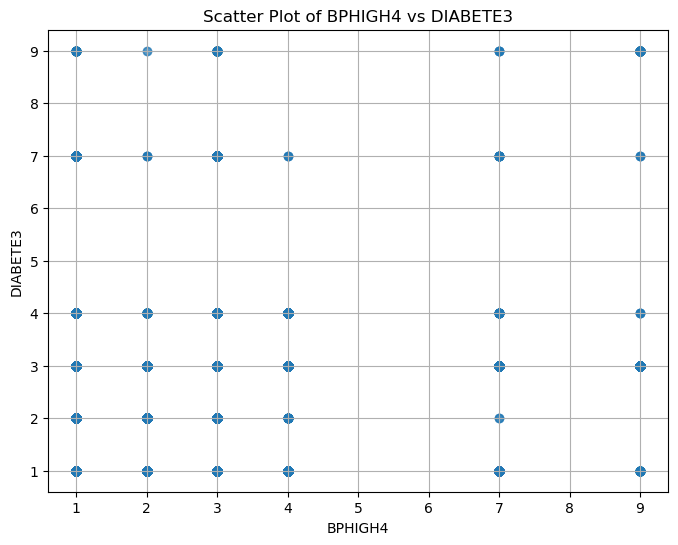

In [27]:
import matplotlib.pyplot as plt


df = pd.read_csv('2015.csv')

# Extract the column you want to visualize
x = df['BPHIGH4']  # Change 'BPHIGH4' to the column you're interested in

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, df['DIABETE3'], alpha=0.5)  # Scatter plot of the column against 'DIABETE3'
plt.title('Scatter Plot of BPHIGH4 vs DIABETE3')
plt.xlabel('BPHIGH4')
plt.ylabel('DIABETE3')
plt.grid(True)
plt.show()

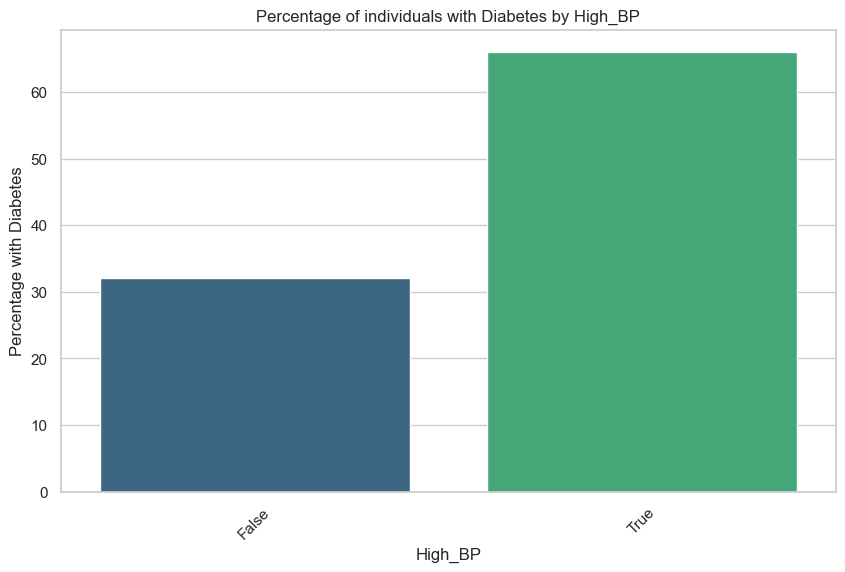

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Load the data
df = pd.read_csv('balanced_data.csv')

# Choose the column you want to investigate
column_of_interest = 'High_BP'  

# Group by the chosen column and calculate the percentage of True values for 'Has_Diabetes'
grouped_data = df.groupby(column_of_interest)['Has_Diabetes'].mean().reset_index()
grouped_data['Has_Diabetes'] *= 100  # Convert to percentage

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=column_of_interest, y='Has_Diabetes', data=grouped_data, palette="viridis")
plt.title('Percentage of individuals with Diabetes by {}'.format(column_of_interest))
plt.xlabel(column_of_interest)
plt.ylabel('Percentage with Diabetes')
plt.xticks(rotation=45)
plt.show()



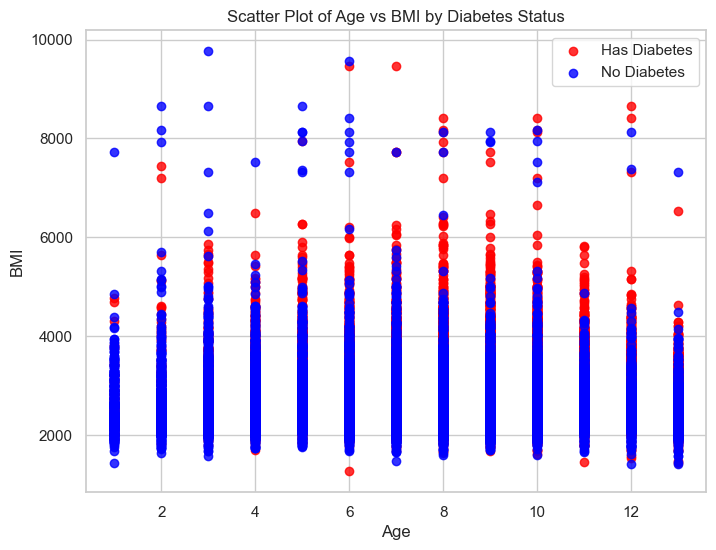

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('balanced_data.csv')

# Select columns 'BMI', 'Age', and 'Has_Diabetes'
bmi_age_diabetes_df = df[['BMI', 'Age', 'Has_Diabetes']]

# Separate data for individuals with and without diabetes
diabetes_yes = bmi_age_diabetes_df[bmi_age_diabetes_df['Has_Diabetes'] == True]
diabetes_no = bmi_age_diabetes_df[bmi_age_diabetes_df['Has_Diabetes'] == False]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(diabetes_yes['Age'], diabetes_yes['BMI'], color='red', label='Has Diabetes', alpha=0.8)
plt.scatter(diabetes_no['Age'], diabetes_no['BMI'], color='blue', label='No Diabetes', alpha=0.8)
plt.title('Scatter Plot of Age vs BMI by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.grid(True)
plt.show()


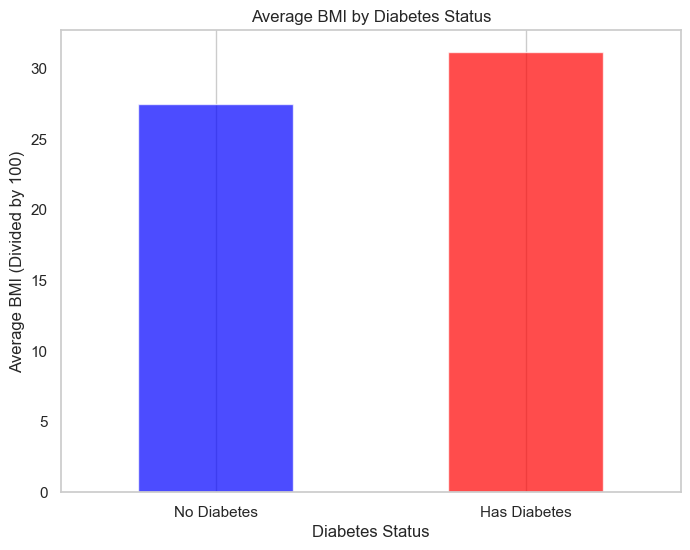

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('balanced_data.csv')

# Divide BMI by 100
df['BMI'] = df['BMI'] / 100

# Calculate average BMI for individuals with and without diabetes
avg_bmi_diabetes = df.groupby('Has_Diabetes')['BMI'].mean()

# Plotting
plt.figure(figsize=(8, 6))
avg_bmi_diabetes.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.title('Average BMI by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Average BMI (Divided by 100)')
plt.xticks([0, 1], ['No Diabetes', 'Has Diabetes'], rotation=0)
plt.grid(axis='y')
plt.show()


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load data
df = pd.read_csv('new_columns.csv')

# Filter rows where DIABETE3 is 1 or 3
df_filtered = df[df['DIABETE3'].isin([1, 3])]

# Drop rows with missing values in the target variable
df_filtered.dropna(subset=['DIABETE3'], inplace=True)

# Check if there are any samples available after dropping missing values
if len(df_filtered) == 0:
    print("No samples available after dropping missing values.")
else:
    # Define features (X) and target variable (y)
    X = df_filtered.drop('DIABETE3', axis=1)
    y = df_filtered['DIABETE3']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    # Scale Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the Logistic Regression Model
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train_scaled, y_train)

    # Make Predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate Model Performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


No samples available after dropping missing values.


/var/folders/wp/1_ldr7mj497129n7mrhbn3hc0000gn/T/ipykernel_44628/252082369.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=df_filtered.columns, inplace=True)


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Read the CSV file
df = pd.read_csv('new_columns.csv')

# Separate features and target variable
X = df.drop(columns=['DIABETE3'])  # Assuming 'DIABETE3' is the target variable
y = df['DIABETE3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy)


/Users/andrewjaffray/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrewjaffray/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8265125725055886
[[  729     0  9232     0     0     1]
 [    6     0   568     0     0     0]
 [  594     0 55839     0     0     0]
 [   38     0  1343     0     0     0]
 [    8     0    71     0     0     0]
 [    0     0    13     0     0     1]]
              precision    recall  f1-score   support

         1.0       0.53      0.07      0.13      9962
         2.0       0.00      0.00      0.00       574
         3.0       0.83      0.99      0.90     56433
         4.0       0.00      0.00      0.00      1381
         7.0       0.00      0.00      0.00        79
         9.0       0.50      0.07      0.12        14

    accuracy                           0.83     68443
   macro avg       0.31      0.19      0.19     68443
weighted avg       0.76      0.83      0.76     68443

Accuracy: 0.8265125725055886


/Users/andrewjaffray/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrewjaffray/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
